In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import numpy as np
import math

## Ссылки
1. [Напряжённость гравитационного поля (Вики)](https://ru.wikipedia.org/wiki/Напряжённость_гравитационного_поля)

# 18. Гравитационное поле Земли
Вычислить и построить графики зависимости напряженности гравитационного поля Земли от радиус-вектора (начало в центре Земли). Визуализировать векторное поле.

In [3]:
G = 6.67428e-11 # G - Гравитационная постоянная
M = 5.9742e+24  # M - Масса земли, Кг
R_Earth = 6371000  

In [4]:
# Напряжённость на расстоянии R
def E(R: float) -> float:
    global G, M
    return G * M / R**2

# 1 - График зависимости от радиус-вектора

In [5]:
# Стартовый интервал (в метрах)
int_start = 0.1
# Конечный интервал (в метрах)
int_end = 7000000
# Шаг в графике
step = 10000
# Максимальное значение по y
y_max = 1000

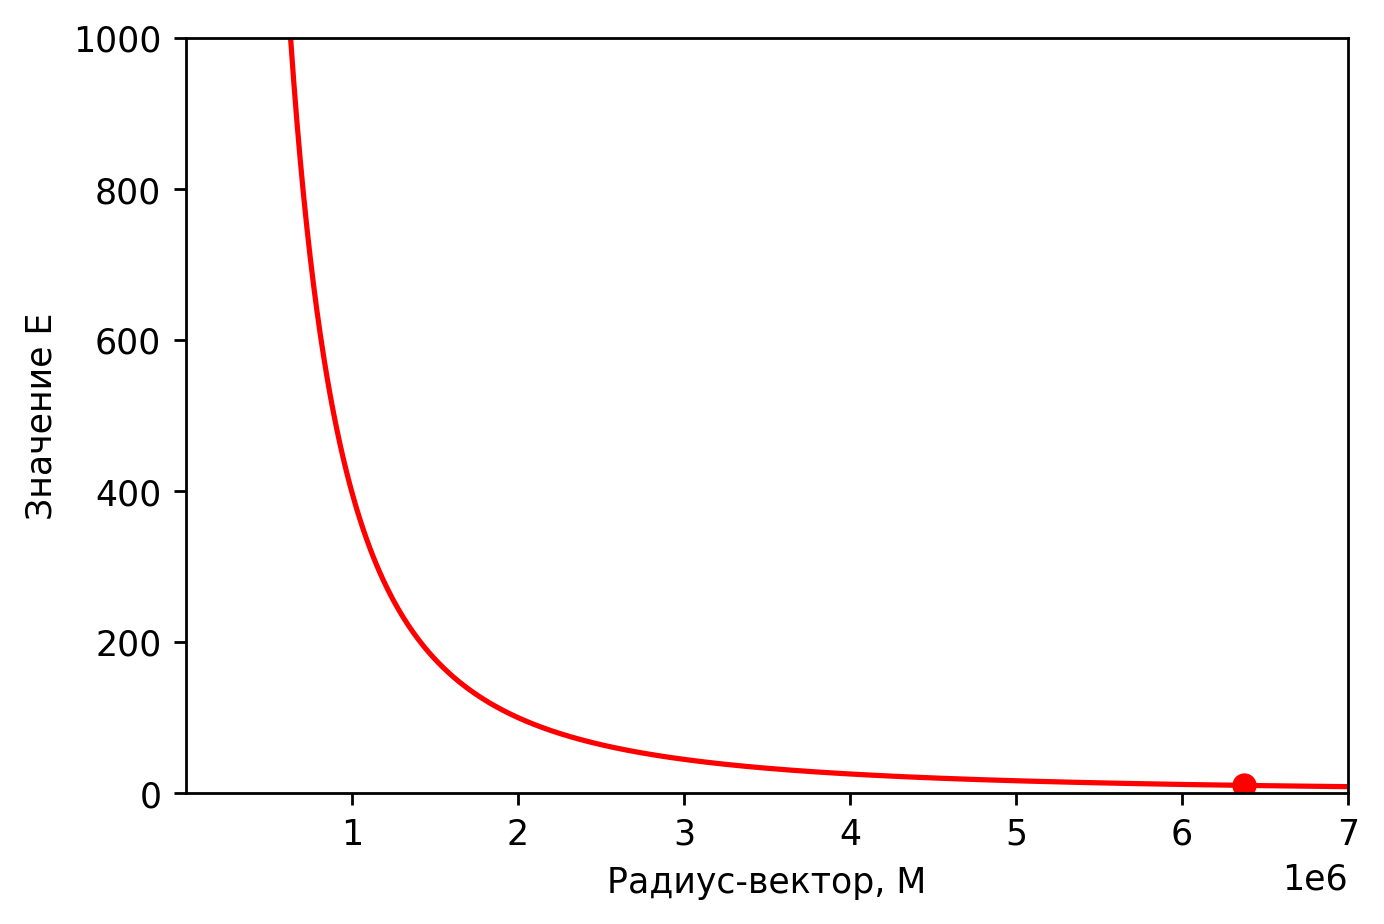

In [6]:
x = []
y = []
r = int_start
while r < int_end:
    x.append(r)
    y.append(E(r))
    r += step
plt.figure(dpi=250)
plt.xlim(int_start, int_end)
plt.ylim(0, y_max)
plt.scatter(R_Earth, E(R_Earth), color="r")
plt.plot(x,y, color="r")
plt.xlabel("Радиус-вектор, М")
plt.ylabel("Значение E")
plt.show()

# 2 - Векторное поле

In [61]:
step = 500000
basearrowlen = 0.05
xlim = (-7000000, 7000000)
ylim = (-7000000, 7000000)

print(f"Векторное поле: {(xlim[1]-xlim[0])//step + 1}x{(ylim[1]-ylim[0])//step + 1}")

Векторное поле: 29x29


In [20]:
E_max = E(step)

def vec(x0: float, y0: float) -> tuple:
    global r, step, E_max, basearrowlen
    dist = math.sqrt(x0*x0 + y0*y0)
    if dist == 0: return (0,0)
    # Длина стрелочки относительно максимальной
    k = basearrowlen + (1-basearrowlen)*E(dist)/E_max
    dx = (-x0/dist)*step*k
    dy = (-y0/dist)*step*k
    return (dx,dy)

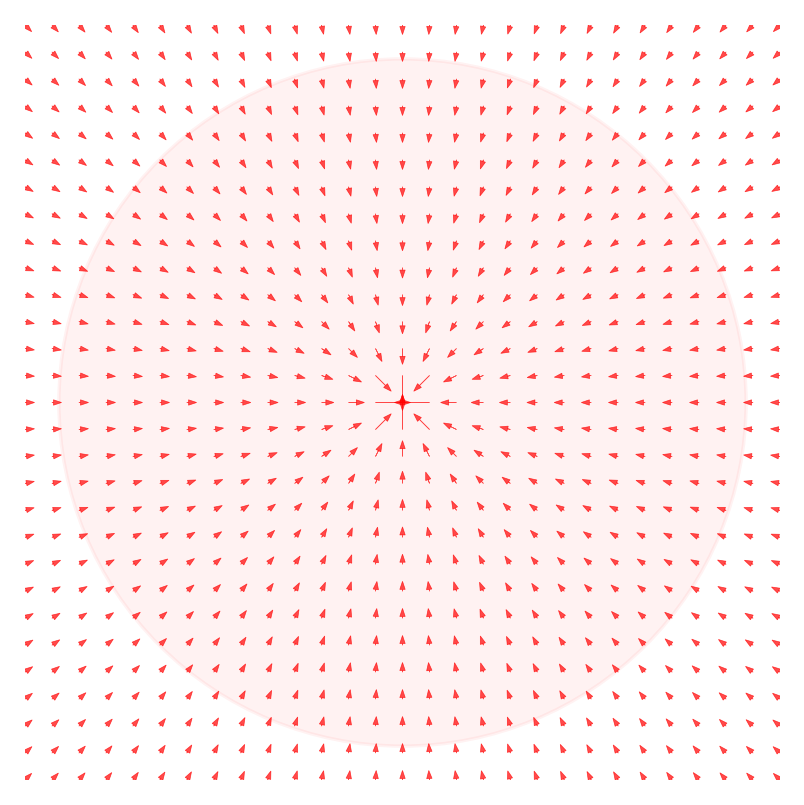

In [65]:
# Initial setup
plt.figure(dpi=250)
plt.xlim(xlim[0], xlim[1])
plt.ylim(ylim[0], ylim[1])

grid = np.mgrid[xlim[0]:(xlim[1]+step):step, ylim[0]:(ylim[1]+step):step]
gx, gy = np.array(grid[0]).reshape(-1), np.array(grid[1]).reshape(-1)

for x,y in zip(gx, gy):
    dx,dy = vec(x,y)
    plt.arrow(x,y,dx,dy, color="r", head_width=step//5, linewidth=0.2, alpha=0.7)

# Show Earth radius if chosen radius is bigger than R_Earth
if (xlim[0] >= R_Earth or xlim[1] >= R_Earth or
    ylim[0] >= R_Earth or ylim[1] >= R_Earth):
    circ = plt.Circle((0,0),R_Earth, color="r", alpha=0.05)
    plt.gca().add_patch(circ)

plt.gca().set_aspect(1)
plt.axis("off")
plt.show()

# Heatmap

In [136]:
# Минимальное расстояние до границ (М)
xlim = (-7000000, 7000000)
ylim = (-7000000, 7000000)
# Шаг для вычислений (М)
step = 10000
# Основание логарифма, с помощью которого вычисляется цвет
colorlogbase = 2

xres, yres = (xlim[1]-xlim[0])//step + 1, (ylim[1]-ylim[0])//step + 1
print(f"Разрешение тепловой карты: {xres}x{yres}")
if xres > 1500 or yres > 1500: print("Время будет исчисляться десятками секунд")

Разрешение тепловой карты: 1401x1401


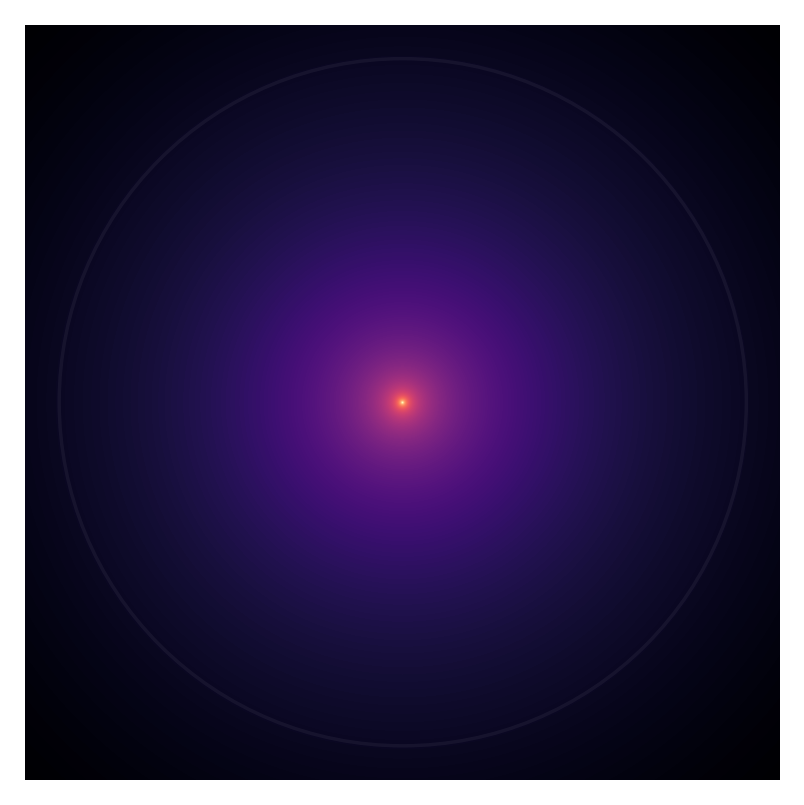

In [137]:
hmap = np.zeros((yres, xres))

E_max = E(step)
for xi in range(xres):
    for yi in range(yres):
        x = xlim[0] + step*xi
        y = ylim[0] + step*yi
        dist = math.sqrt(x*x + y*y)
        if dist == 0:
            hmap[yi][xi] = math.log(E_max, colorlogbase)
        else:
            hmap[yi][xi] = math.log(E(dist), colorlogbase)     

plt.figure(dpi=250)
# magma, rainbow
plt.imshow(hmap, cmap="magma", origin="lower")
# Show Earth radius if chosen radius is bigger than R_Earth
if (xlim[0] >= R_Earth or xlim[1] >= R_Earth or
    ylim[0] >= R_Earth or ylim[1] >= R_Earth):
    xcenter = xres*(-xlim[0])/(xlim[1]-xlim[0])
    ycenter = yres*(-ylim[0])/(ylim[1]-ylim[0])

    circrad = None
    if (xlim[0] != 0):
        circrad = xcenter*(R_Earth/abs(xlim[0]))
    else:
        circrad = (xres-xcenter)*(R_Earth/abs(xlim[1]))
    circ = plt.Circle((xcenter,ycenter),circrad, color="w", alpha=0.05, fill=False)
    plt.gca().add_patch(circ)


plt.gca().set_aspect(1)
plt.axis("off")
plt.show()